In [1]:
# Importing modules
from numba import jit, vectorize, boolean, complex128
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

---

## Naive method

In [42]:
# Creating grid
def make_grid(p_re, p_im):
    '''
    Creates a 2D array of complex numbers given a resolution parameters.
    :p_re: Resolution of the Real component of the grid
    :p_im: Resolution of the Imaginary component of the grid
    '''
    real = np.linspace(-2, 1, p_re)
    imag = np.linspace(-1.5, 1.5, p_im)
    grid_real, grid_imag = np.meshgrid(real, imag)
    return grid_real + grid_imag * 1j

# Check if the point is in Mandelbrot set
def isMandelbrot(c, maxIter, z=0, T=2):
    '''
    Checks if a complex number is in Mandelbrot set.
    :c: Comlex number
    :maxIter: Maximum iteration number to check for
    :z: (default:0) Starting point of calculation
    :T: (default:2) Threshold for determining if the point is in set
    '''
    for step in range(maxIter):
        z = z*z + c
        if abs(z) > T:
            return step
    return 0

# Compute Mandelbrot set
def Mandelbrot_set_naive(grid):
    '''
    Makes a Mandelbrot set.
    :grid: 2D array of complex numbers derived from make_grid() function
    '''
    result_grid = np.zeros(grid.shape)
    for i, row in enumerate(grid):
        for j, col in enumerate(grid):
            result_grid[i][j] = isMandelbrot(grid[i][j], 100) 
    return result_grid


In [43]:
grid = make_grid(5000, 5000)
%timeit -r 2 -n 1 Mandelbrot_set_naive(grid)

1min 2s ± 240 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


Visualization

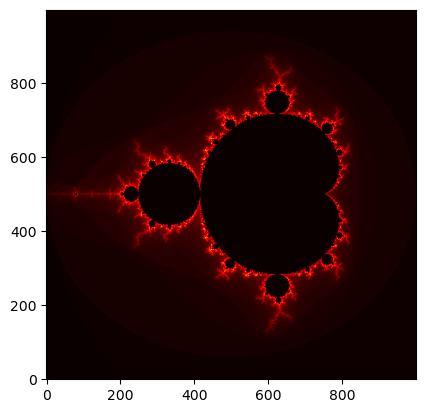

In [44]:
# Create Mandelbrot image helper function
def create_image(p_re, p_im, cmap='hot'):
    '''
    Make an image out of Mandelbrot set.
    :p_re: Resolution of the Real component of the grid
    :p_im: Resolution of the Imaginary component of the grid
    '''
    grid = make_grid(p_re, p_im)
    result_grid = Mandelbrot_set_naive(grid)
    plt.imshow(result_grid, cmap=cmap, origin='lower')

create_image(1000,1000)

---

## Naive method + different data types

---

### numpy.float64

In [50]:
# Creating grid
def make_grid(p_re, p_im):
    '''
    Creates a 2D array of complex numbers given a resolution parameters.
    :p_re: Resolution of the Real component of the grid
    :p_im: Resolution of the Imaginary component of the grid
    '''
    real = np.linspace(-2, 1, p_re, dtype=np.float64)
    imag = np.linspace(-1.5, 1.5, p_im, dtype=np.float64)
    grid_real, grid_imag = np.meshgrid(real, imag)
    return grid_real + grid_imag * 1j

# Check if the point is in Mandelbrot set
def isMandelbrot(c, maxIter, z=0, T=2):
    '''
    Checks if a complex number is in Mandelbrot set.
    :c: Comlex number
    :maxIter: Maximum iteration number to check for
    :z: (default:0) Starting point of calculation
    :T: (default:2) Threshold for determining if the point is in set
    '''
    for step in range(maxIter):
        z = z*z + c
        if abs(z) > T:
            return step
    return 0

# Compute Mandelbrot set
def Mandelbrot_set_naive(grid):
    '''
    Makes a Mandelbrot set.
    :grid: 2D array of complex numbers derived from make_grid() function
    '''
    result_grid = np.zeros(grid.shape)
    for i, row in enumerate(grid):
        for j, col in enumerate(grid):
            result_grid[i][j] = isMandelbrot(grid[i][j], 100) 
    return result_grid


In [51]:
grid = make_grid(5000, 5000)
%timeit -r 2 -n 1 Mandelbrot_set_naive(grid)

1min 1s ± 9.42 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


---

### numpy.float32

In [45]:
# Creating grid
def make_grid(p_re, p_im):
    '''
    Creates a 2D array of complex numbers given a resolution parameters.
    :p_re: Resolution of the Real component of the grid
    :p_im: Resolution of the Imaginary component of the grid
    '''
    real = np.linspace(-2, 1, p_re, dtype=np.float32)
    imag = np.linspace(-1.5, 1.5, p_im, dtype=np.float32)
    grid_real, grid_imag = np.meshgrid(real, imag)
    return grid_real + grid_imag * 1j

# Check if the point is in Mandelbrot set
def isMandelbrot(c, maxIter, z=0, T=2):
    '''
    Checks if a complex number is in Mandelbrot set.
    :c: Comlex number
    :maxIter: Maximum iteration number to check for
    :z: (default:0) Starting point of calculation
    :T: (default:2) Threshold for determining if the point is in set
    '''
    for step in range(maxIter):
        z = z*z + c
        if abs(z) > T:
            return step
    return 0

# Compute Mandelbrot set
def Mandelbrot_set_naive(grid):
    '''
    Makes a Mandelbrot set.
    :grid: 2D array of complex numbers derived from make_grid() function
    '''
    result_grid = np.zeros(grid.shape)
    for i, row in enumerate(grid):
        for j, col in enumerate(grid):
            result_grid[i][j] = isMandelbrot(grid[i][j], 100) 
    return result_grid


In [47]:
grid = make_grid(5000, 5000)
%timeit -r 2 -n 1 Mandelbrot_set_naive(grid)

1min 48s ± 377 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


---

### numpy.float16

In [48]:
# Creating grid
def make_grid(p_re, p_im):
    '''
    Creates a 2D array of complex numbers given a resolution parameters.
    :p_re: Resolution of the Real component of the grid
    :p_im: Resolution of the Imaginary component of the grid
    '''
    real = np.linspace(-2, 1, p_re, dtype=np.float16)
    imag = np.linspace(-1.5, 1.5, p_im, dtype=np.float16)
    grid_real, grid_imag = np.meshgrid(real, imag)
    return grid_real + grid_imag * 1j

# Check if the point is in Mandelbrot set
def isMandelbrot(c, maxIter, z=0, T=2):
    '''
    Checks if a complex number is in Mandelbrot set.
    :c: Comlex number
    :maxIter: Maximum iteration number to check for
    :z: (default:0) Starting point of calculation
    :T: (default:2) Threshold for determining if the point is in set
    '''
    for step in range(maxIter):
        z = z*z + c
        if abs(z) > T:
            return step
    return 0

# Compute Mandelbrot set
def Mandelbrot_set_naive(grid):
    '''
    Makes a Mandelbrot set.
    :grid: 2D array of complex numbers derived from make_grid() function
    '''
    result_grid = np.zeros(grid.shape)
    for i, row in enumerate(grid):
        for j, col in enumerate(grid):
            result_grid[i][j] = isMandelbrot(grid[i][j], 100) 
    return result_grid


In [49]:
grid = make_grid(5000, 5000)
%timeit -r 2 -n 1 Mandelbrot_set_naive(grid)

1min 48s ± 114 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


**Findings**: 
- Float32 and Float16 are drastically slower than not specifying dtype.
- Both seem to be almost the same in terms of runtimes.

**Explanation**:
- Modern hardware was built to natively support float64 (double-precision) and not lower float precisions
- Due to that, casting our data into lower precision types disables hardware accelerated computation 
- Also, casting to lower precision introduces overhead which negatively impacts our runtime

---

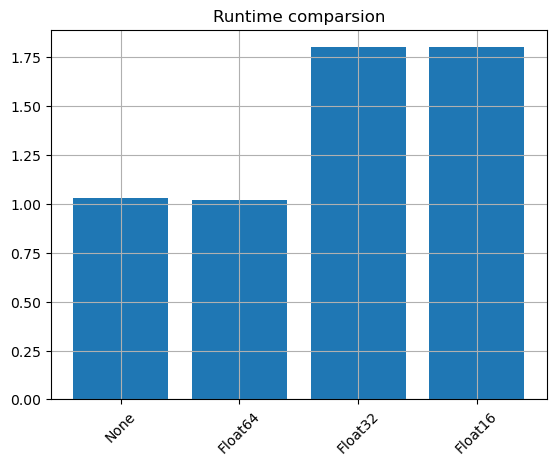

In [54]:
implementations = ["None", "Float64", "Float32", "Float16"]
runtimes = [1.03, 1.02, 1.8, 1.8]

plt.bar(implementations, runtimes, log=False)
plt.xticks(rotation=45)
plt.title("Runtime comparsion")
plt.grid()
plt.show()

Clearly:
**None = Float64**

---